<a href="https://colab.research.google.com/github/inekeyuliam/data-science-classification-python/blob/master/SVM_Indian_Liver_Patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


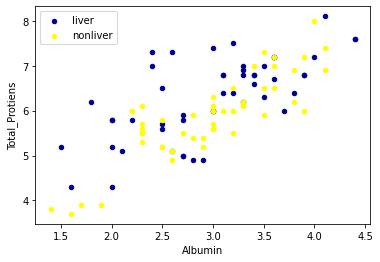

In [ ]:
ax = df[df['Dataset'] == 1][0:50].plot(kind='scatter', x='Albumin', y='Total_Protiens', color='DarkBlue', label='liver');
df[df['Dataset'] == 2][0:50].plot(kind='scatter', x='Albumin', y='Total_Protiens', color='Yellow', label='nonliver', ax=ax);
plt.show()

In [ ]:
#df['Dataset'].value_counts()
# 1 means liver
# 2 means non liver
df.dtypes
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Age
False    583
Name: Age, dtype: int64

Gender
False    583
Name: Gender, dtype: int64

Total_Bilirubin
False    583
Name: Total_Bilirubin, dtype: int64

Direct_Bilirubin
False    583
Name: Direct_Bilirubin, dtype: int64

Alkaline_Phosphotase
False    583
Name: Alkaline_Phosphotase, dtype: int64

Alamine_Aminotransferase
False    583
Name: Alamine_Aminotransferase, dtype: int64

Aspartate_Aminotransferase
False    583
Name: Aspartate_Aminotransferase, dtype: int64

Total_Protiens
False    583
Name: Total_Protiens, dtype: int64

Albumin
False    583
Name: Albumin, dtype: int64

Albumin_and_Globulin_Ratio
False    579
True       4
Name: Albumin_and_Globulin_Ratio, dtype: int64

Dataset
False    583
Name: Dataset, dtype: int64



In [ ]:
avg_norm_loss = df["Albumin_and_Globulin_Ratio"].astype("float").mean(axis=0)
df["Albumin_and_Globulin_Ratio"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
df['Total_Bilirubin'] = df['Total_Bilirubin'].astype('int')
df['Direct_Bilirubin'] = df['Direct_Bilirubin'].astype('int')
df['Total_Protiens'] = df['Total_Protiens'].astype('int')
df['Albumin'] = df['Albumin'].astype('int')
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].astype('int')


feature_df = df[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].values
df.dtypes
  

Age                            int64
Gender                        object
Total_Bilirubin                int64
Direct_Bilirubin               int64
Alkaline_Phosphotase           int64
Alamine_Aminotransferase       int64
Aspartate_Aminotransferase     int64
Total_Protiens                 int64
Albumin                        int64
Albumin_and_Globulin_Ratio     int64
Dataset                        int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(['Female','Male'])
feature_df[:,1] = le_sex.transform(feature_df[:,1]) 


In [ ]:
X = np.asarray(feature_df)
X[0:5]


array([[65, 0, 0, 0, 187, 16, 18, 6, 3, 0],
       [62, 1, 10, 5, 699, 64, 100, 7, 3, 0],
       [62, 1, 7, 4, 490, 60, 68, 7, 3, 0],
       [58, 1, 1, 0, 182, 14, 20, 6, 3, 1],
       [72, 1, 3, 2, 195, 27, 59, 7, 2, 0]], dtype=object)

In [ ]:
y = np.asarray(df['Dataset'])
y[0:5]


array([1, 1, 1, 1, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print("training set : ", X_train.shape, y_train.shape)
print("test set : ", X_test.shape, y_test.shape)

training set :  (466, 10) (466,)
test set :  (117, 10) (117,)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))


Avg F1-score: 0.5553
Jaccard score: 0.6838


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
